# Assignment 2 
## Question 1 - LLM for data engineering
### LLMs’ fast, articulate answers to expert questions can help data engineers discover datasets, write and debug code, document procedures, and learn new techniques as they build data pipelines. In this question, you are required to write suitable prompts for ChatGPT to achieve the following targets.

1.Assume you need some datasets for training a knowledge-grounded dialogue generation model. Please
utilize the ChatGPT (GPT4) to find the datasets you need. List the prompts you give and the outputs of
ChatGPT.

**Solution:**  

**input:**  
i want to train a knowledge-grounded dialogue generation model. First i should have some datasets for training. Generate several url about datasets, for each dataset, give a simple description.  

**output:**  
Certainly! Here are several datasets that you can use to train a knowledge-grounded dialogue generation model:

Wizard of Wikipedia: This dataset contains conversations where human "wizards" play the role of a chatbot assistant and have access to information from Wikipedia. The conversations involve asking and answering questions based on the available knowledge. Dataset Link

CoQA: The Conversational Question Answering dataset consists of dialogues where one participant asks a series of questions about a given document, and another participant provides answers. The dataset focuses on understanding natural language questions and generating relevant responses. Dataset Link

OpenDialKG: This dataset combines dialogue data with structured knowledge graphs. It includes conversations where participants interact with a knowledge graph and ask questions based on the available knowledge. The dataset is designed to encourage research on knowledge-grounded dialogue systems. Dataset Link

Persona-Chat: This dataset contains dialogues with pairs of crowdworkers. Each participant is assigned a persona, and they have to chat while staying in character. The dataset aims to improve dialogue models' ability to generate consistent and contextually appropriate responses. Dataset Link

Topical-Chat: This dataset focuses on generating dialogue responses in specific topics. It includes conversations where participants discuss various topics while having access to external knowledge sources. The goal is to create engaging and informative conversations on specific subjects. Dataset Link

EmpatheticDialogues: This dataset emphasizes generating empathetic responses in dialogue systems. It contains conversations where one participant shares a personal story, and the other participant responds empathetically. The dataset aims to improve dialogue models' ability to understand and respond sensitively to human emotions. Dataset Link

Remember to review the licensing and usage terms for each dataset before using them for training your model.

2.CMU DoG dataset is a document grounded dataset for text conversations. ”Document Grounded
Conversations” are conversations that are about the contents of a specified document. In this dataset the
specified documents are Wikipedia articles about popular movies. The dataset contains 4112 conversations with
an average of 21.43 turns per conversation. Please use ChatGPT to preprocess a conversation sample. You
should list the prompts you use and the inputs to ChatGPT and outputs from ChatGPT.  
**Solution:**  
prompt:  
i want to preprocess a conversation sample. The conversation is about the contents of a specified document. The specified documents are Wikipedia articles about popular movies. The dataset contains 4112 conversations with an average of 21.43 turns per conversation.
list the steps of preprocessing.
output:  
Sure! Here are the steps you can follow to preprocess a conversation sample from the CMU DoG dataset, which is about the contents of a specified document (Wikipedia articles about popular movies):

Data Cleaning:

Remove any unwanted characters, such as special symbols or punctuation marks.
Correct any spelling errors or inconsistencies.
Handle any formatting issues, such as removing extra spaces or line breaks.
Splitting Conversation:

Split the conversation into individual dialogue turns. Each turn typically represents one participant's utterance or response.
Identify the speaker for each turn if it is not explicitly mentioned in the dataset.
Knowledge Extraction:

Extract the specified document (Wikipedia article about a popular movie) mentioned in the conversation.
Preprocess the document separately if needed, such as cleaning, tokenizing, or removing HTML tags.
Input and Output Segmentation:

Separate the conversation turns into input and output sections.
Determine which turns correspond to the input and which ones correspond to the output.
Typically, the input section includes previous dialogue turns or questions, and the output section contains the corresponding answers or responses.
Language Processing:

Tokenize and tokenize the conversation text.
Perform additional language processing tasks based on your specific requirements, such as lemmatization, part-of-speech tagging, or named entity recognition.
Building Training Samples:

Combine the preprocessed conversation input and output sections to create training samples.
Convert the text into a suitable vector representation, such as word embeddings or one-hot encodings, based on the chosen model architecture.
Optional Data Augmentation:

Consider applying data augmentation techniques to enrich the dataset if desired.
This may involve generating diverse responses, paraphrasing, or adding variations to the conversation content to enhance model diversity and robustness.
Remember to consider the specific requirements of your dialogue generation model and make any necessary adjustments to the preprocessing steps accordingly.

prompt:  
here is a sample conversation from the CMU DoG dataset:
{
  "date": "2018-02-20T19:15:08.841Z", 
  "history": [
    {
      "docIdx": 0, 
      "text": "hello", 
      "uid": "user1", 
      "utcTimestamp": "2018-02-20T19:15:16.038Z"
    }, 
    {
      "docIdx": 0, 
      "text": "hello there, I have not seen this movie so im going to take a minute to look it over :)", 
      "uid": "user2", 
      "utcTimestamp": "2018-02-20T19:15:36.022Z"
    }, 
    {
      "docIdx": 0, 
      "text": "Alright that is fine. What is the movie?", 
      "uid": "user1", 
      "utcTimestamp": "2018-02-20T19:15:49.258Z"
    }, 
    {
      "docIdx": 0, 
      "text": "The movie is The Social Network", 
      "uid": "user2", 
      "utcTimestamp": "2018-02-20T19:15:56.234Z"
    }, 
    {
      "docIdx": 0, 
      "text": "I have not seen that one either.", 
      "uid": "user1", 
      "utcTimestamp": "2018-02-20T19:16:26.551Z"
    }, 
    {
      "docIdx": 0, 
      "text": "It appears to be like a biographical movie about Mark Zuckerberg and when he creates Facebook.", 
      "uid": "user2", 
      "utcTimestamp": "2018-02-20T19:16:32.140Z"
    }, 
    {
      "docIdx": 0, 
      "text": "Ohh yes I remember hearing about that movie, but it was a long time ago it feels like.", 
      "uid": "user1", 
      "utcTimestamp": "2018-02-20T19:17:04.252Z"
    }, 
    {
      "docIdx": 0, 
      "text": "Rotten Tomatoes has rated it 96% so that's decent, and it is a movie from 2010", 
      "uid": "user2", 
      "utcTimestamp": "2018-02-20T19:17:08.213Z"
    }, 
    {
      "docIdx": 0, 
      "text": "may be worth watching!", 
      "uid": "user2", 
      "utcTimestamp": "2018-02-20T19:17:21.342Z"
    }, 
    {
      "docIdx": 1, 
      "text": "Yes I think it could be, although I personally do not like facebook as a company.", 
      "uid": "user1", 
      "utcTimestamp": "2018-02-20T19:18:05.350Z"
    }, 
    {
      "docIdx": 1, 
      "text": "the movie portrays the founding of social networking website Facebook and the resulting lawsuits. It even has Justin Timberlake in it, I don't think I've ever seen him act. ", 
      "uid": "user2", 
      "utcTimestamp": "2018-02-20T19:18:11.549Z"
    }, 
    {
      "docIdx": 1, 
      "text": "I have not seen him in any movies in years", 
      "uid": "user1", 
      "utcTimestamp": "2018-02-20T19:18:26.046Z"
    }, 
    {
      "docIdx": 1, 
      "text": "Any other big name actors in it?", 
      "uid": "user1", 
      "utcTimestamp": "2018-02-20T19:19:35.351Z"
    }, 
    {
      "docIdx": 1, 
      "text": "hmm so I just got a scene described to me, it turns out Mark was dumped so he made a blog about her ... kind of childish.... then he made a site for people to \"rate\" women on looks...the college put him on porbation. and then that captured the attention of two classmates , that how the trio came to work on facebook I guess.", 
      "uid": "user2", 
      "utcTimestamp": "2018-02-20T19:19:55.668Z"
    }, 
    {
      "docIdx": 1, 
      "text": "So it came out of Mark being kind of a douche, Makes sense when I think about the company ", 
      "uid": "user1", 
      "utcTimestamp": "2018-02-20T19:20:34.278Z"
    }, 
    {
      "docIdx": 2, 
      "text": "Jesse Eisenberg, Andrew Garfield, Armie Hammer , and Max Minghella, not famailiar with any of those, id have to look on IMBD", 
      "uid": "user2", 
      "utcTimestamp": "2018-02-20T19:20:42.059Z"
    }, 
    {
      "docIdx": 2, 
      "text": "I am not familiar\n with any of them either", 
      "uid": "user1", 
      "utcTimestamp": "2018-02-20T19:21:05.185Z"
    }, 
    {
      "docIdx": 2, 
      "text": "another scene came up, i guess this site was just for hrvard but then they expanded to Yale, Columbia, and Stanford... sounds very elite like lol", 
      "uid": "user2", 
      "utcTimestamp": "2018-02-20T19:21:34.893Z"
    }, 
    {
      "docIdx": 2, 
      "text": "Seems like it was intended for the elite, but he saw the amount of money to be made by globalizing it", 
      "uid": "user1", 
      "utcTimestamp": "2018-02-20T19:22:43.385Z"
    }, 
    {
      "docIdx": 2, 
      "text": "and go figure Sean Parker who co founded Napster is in on it with Mark to make Facebook, i guess he is the one who persuaded him to drop the THE  as it was called Thefacebook originally", 
      "uid": "user2", 
      "utcTimestamp": "2018-02-20T19:22:44.601Z"
    }, 
    {
      "docIdx": 2, 
      "text": "removing the word \"the\" was a smart choice atleast", 
      "uid": "user1", 
      "utcTimestamp": "2018-02-20T19:23:19.866Z"
    }, 
    {
      "docIdx": 3, 
      "text": "yeah, flows a bit better I suppose so you can say \"facebook me\" lol", 
      "uid": "user2", 
      "utcTimestamp": "2018-02-20T19:23:46.092Z"
    }, 
    {
      "docIdx": 3, 
      "text": "ah new scene, talking about all the lawsuits that came against him. ", 
      "uid": "user2", 
      "utcTimestamp": "2018-02-20T19:24:08.189Z"
    }, 
    {
      "docIdx": 3, 
      "text": "I feel like he has always been in trouble for the way he operates then", 
      "uid": "user1", 
      "utcTimestamp": "2018-02-20T19:24:24.002Z"
    }, 
    {
      "docIdx": 3, 
      "text": "Now it is the way he markets ads by listening through the phones", 
      "uid": "user1", 
      "utcTimestamp": "2018-02-20T19:24:38.500Z"
    }, 
    {
      "docIdx": 3, 
      "text": "ending sounds weird, they said it ends with him sending a friend request to his ex who dumped him.  ironic.", 
      "uid": "user2", 
      "utcTimestamp": "2018-02-20T19:24:54.913Z"
    }, 
    {
      "docIdx": 3, 
      "text": "Im sure that was just for the hollywood effect", 
      "uid": "user1", 
      "utcTimestamp": "2018-02-20T19:25:10.035Z"
    }, 
    {
      "docIdx": 3, 
      "text": "yeah, he is a very selfish type of person I think in reality", 
      "uid": "user2", 
      "utcTimestamp": "2018-02-20T19:25:15.982Z"
    }, 
    {
      "docIdx": 3, 
      "text": "I agree", 
      "uid": "user1", 
      "utcTimestamp": "2018-02-20T19:25:25.134Z"
    }
  ], 
  "rating": 2, 
  "status": 1, 
  "uid1LogInTime": "2018-02-20T19:15:08.841Z", 
  "uid1LogOutTime": "2018-02-20T19:25:26.348Z", 
  "uid1response": {
    "feedback": "I hate facebook and mark as a company", 
    "response": [
      2, 
      3, 
      5
    ], 
    "type": "finish"
  }, 
  "uid2LogInTime": "2018-02-20T19:15:08.854Z", 
  "uid2LogOutTime": "2018-02-20T19:25:42.640Z", 
  "uid2response": {
    "feedback": null, 
    "response": [
      1, 
      2, 
      3, 
      5
    ], 
    "type": "finish"
  }, 
  "user1_id": "USR1723", 
  "user2_id": "USR3213", 
  "whoSawDoc": [
    "user2"
  ], 
  "wikiDocumentIdx": 17
}
give the preprocessing method.

output:  
Based on the provided sample conversation from the CMU DoG dataset, it appears that the conversation is already preprocessed and structured in a JSON format. However, if you are looking for a general preprocessing method for text data, here are some common steps that can be applied:

1. Tokenization: Split the text into individual words or tokens. This can be done using whitespace or more advanced techniques like word tokenization libraries.

2. Lowercasing: Convert all the tokens to lowercase to ensure case-insensitive matching.

3. Removing Punctuation: Remove any punctuation marks from the tokens, such as commas, periods, and question marks.

4. Stop Word Removal: Eliminate common words that do not carry much meaning, such as "a," "the," "is," etc. These words are known as stop words.

5. Lemmatization or Stemming: Reduce words to their base or root form. Lemmatization considers the context and converts words to meaningful base forms, while stemming applies simpler rules to chop off suffixes. This step helps in reducing the vocabulary size and normalizing the text.

6. Removing Special Characters or URLs: Eliminate special characters, numbers, and URLs that may not contribute to the understanding of the text.

7. Removing Extra Whitespace: Remove any extra whitespace or line breaks to ensure consistent formatting.

8. Encoding: Convert the preprocessed text into a numerical representation suitable for machine learning algorithms. This can involve techniques like one-hot encoding or word embeddings.

It's important to note that the preprocessing steps can vary depending on the specific task, dataset, and requirements. The steps mentioned above provide a general outline, and additional steps or modifications may be needed based on the specific context and goals of the analysis.

3.Let the ChatGPT generate a preprocessing code to process CMU DoG dataset for the inputs of T5
model. List the prompts you use and the outputs of ChatGPT. Considering that errors in codes are inevitable,
you should fix the codes to make it run. Please use the fixed codes to preprocess the conversation samples in
CMU DOG and list the first 5 processed conversation samples here.  
**Solution:**  
prompt:  
given the conversation above, generate a preprocessing code to process CMU DoG dataset.  
output:  
Certainly! Here's an example of a preprocessing code that you can use to process the CMU DoG dataset based on the conversation provided:

```python
import json
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required resources from NLTK
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Tokenization
    tokens = text.split()

    # Lowercasing
    tokens = [token.lower() for token in tokens]

    # Removing Punctuation
    tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens]

    # Stop Word Removal
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Removing Special Characters or URLs
    tokens = [re.sub(r'[^a-zA-Z0-9]', '', token) for token in tokens]
    tokens = [token for token in tokens if token != '']

    # Join the tokens back into a single string
    processed_text = ' '.join(tokens)

    return processed_text

# Load and preprocess the CMU DoG dataset
with open('cmu_dog_dataset.json', 'r') as file:
    data = json.load(file)

preprocessed_data = []
for conversation in data:
    preprocessed_conversation = []
    for utterance in conversation['utterances']:
        preprocessed_utterance = preprocess_text(utterance['text'])
        preprocessed_conversation.append(preprocessed_utterance)
    preprocessed_data.append(preprocessed_conversation)

# Save the preprocessed data
with open('cmu_dog_dataset_preprocessed.json', 'w') as file:
    json.dump(preprocessed_data, file)
```

In this code, we define a `preprocess_text` function that applies the preprocessing steps discussed earlier to a given text. We then load the CMU DoG dataset from a JSON file and iterate over the conversations and utterances. For each utterance, we preprocess the text using the `preprocess_text` function and store the preprocessed data in a new list. Finally, we save the preprocessed data back into a JSON file.

Please make sure to adjust the file paths and names based on your specific setup. Additionally, you may need to install the required packages (`nltk` and its resources) if you haven't done so already.



In [ ]:
!pip install nltk

In [37]:
import json
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required resources from NLTK
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Tokenization
    tokens = text.split()

    # Lowercasing
    tokens = [token.lower() for token in tokens]

    # Removing Punctuation
    tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens]

    # Stop Word Removal
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Removing Special Characters or URLs
    tokens = [re.sub(r'[^a-zA-Z0-9]', '', token) for token in tokens]
    tokens = [token for token in tokens if token != '']

    # Join the tokens back into a single string
    processed_text = ' '.join(tokens)

    return processed_text

# Load and preprocess the CMU DoG dataset
# 读取test文件夹下的文件
file_path = 'datasets-CMU_DoG-master/Conversations/test/'
file_list = os.listdir(file_path)
save_paths = 'preprocessed_data/'
i=0
for file in file_list:
    file_name=str(file)
    file_name_path = os.path.join(file_path, file_name)
    with open(file_name_path, 'r') as file_data:
        data = json.load(file_data)
        preprocessed_data = []
        history=data['history']
        for utterance in history:
            preprocessed_utterance = preprocess_text(utterance['text'])
            preprocessed_data.append(preprocessed_utterance)
        print(preprocessed_data)
        # Save the preprocessed data
        save_path = os.path.join(save_paths, file_name)
        with open(save_path, 'w') as file_save:
            json.dump(preprocessed_data, file_save)
        i=i+1
        if i==6:
            break





['hey hows going like catch much', 'opps meant mean girl', 'oh mean girl great movie like lindsay lohan role cady heron', 'isnt lindsey like best female actress time', 'yeah thats name movie', 'think rachel mcadams even better role regina george however', 'would agree', 'racheal adam wonderful well', 'also like regina george well hard pick honest', 'well regina george played rachel mcadams wonder hard pick case', 'know tina fey wrote movie', 'really delivered knockout mean girl', 'favorite scene mean girl', 'personally like scene cady met plastic', 'love revenge plot best think', 'oh yeah plan revenge regina awesome', 'know mean girl partially based book', 'really surprised', 'yeah based book queen bee wannabe sound like kind book', 'oh alergic bee', 'haha good one', 'burn book designed fail method', 'knew gonna cause funny drama haha', 'drama burn book caused serious', 'math teacher got defamed drug dealer', 'regina getting hit bus really intenese scene', 'believe cady took blame burn

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\12694\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\12694\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Question 2 - Data Indexing
### Given the following B+-tree, please answer following questions.
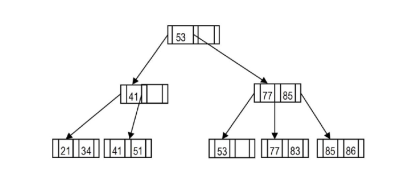

1.What is the value of p for this B+-tree? (Note that p is the order of a B+-tree)

**Solution:**
p is 3

2.Can you re-build a taller B+-tree with the same value of p using the same set of search-key values in the leaf nodes of the given tree? If yes, show the steps by drawing a new diagram whenever the height of the tree increases.

**Solution:**  
height = 1  
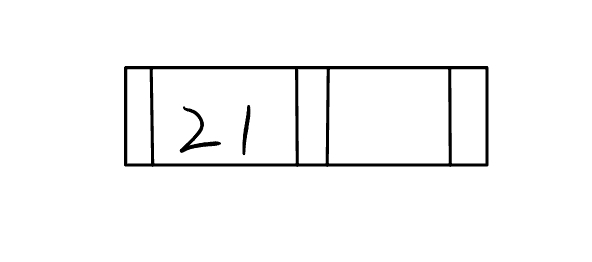  
height = 2  
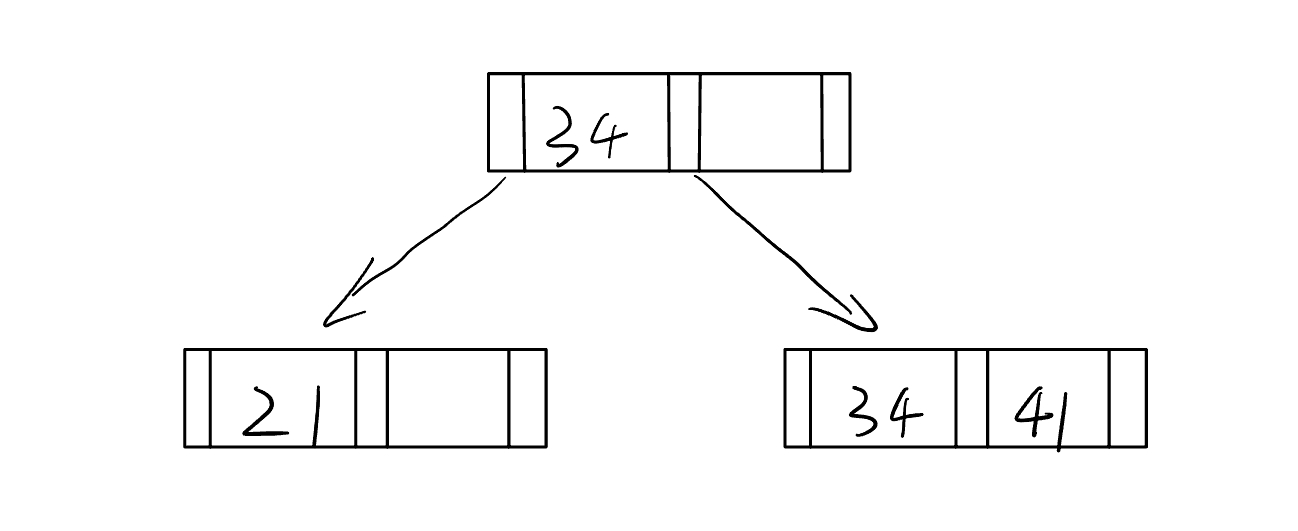  
height = 3  
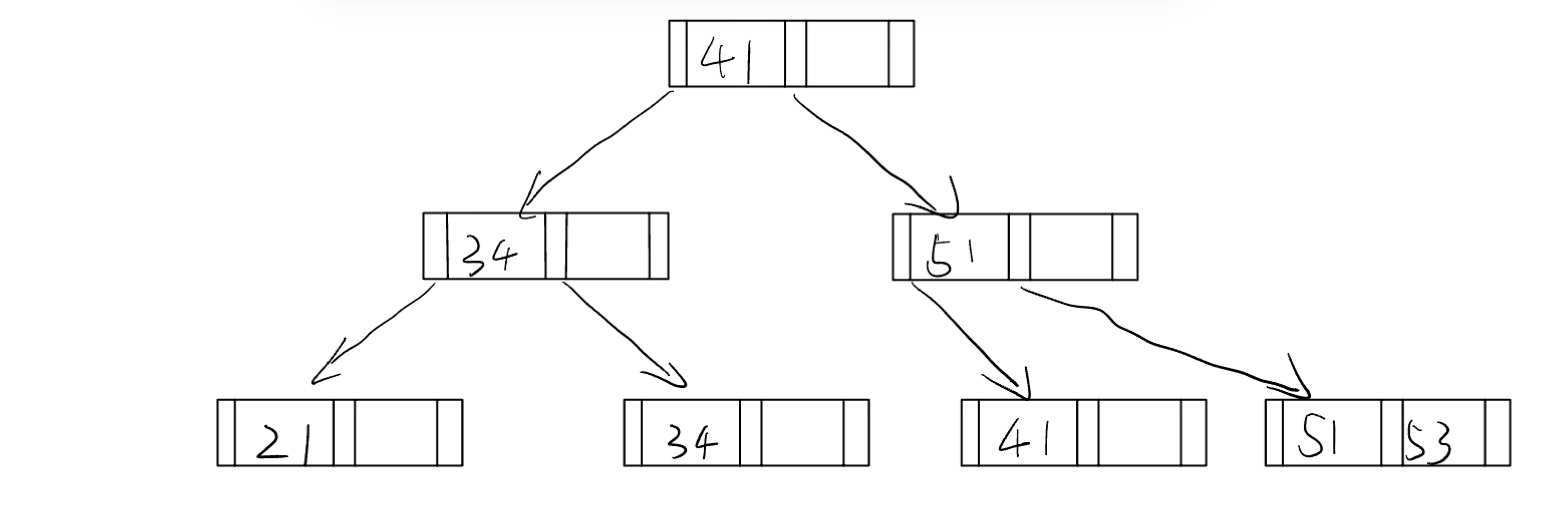  
height = 4  
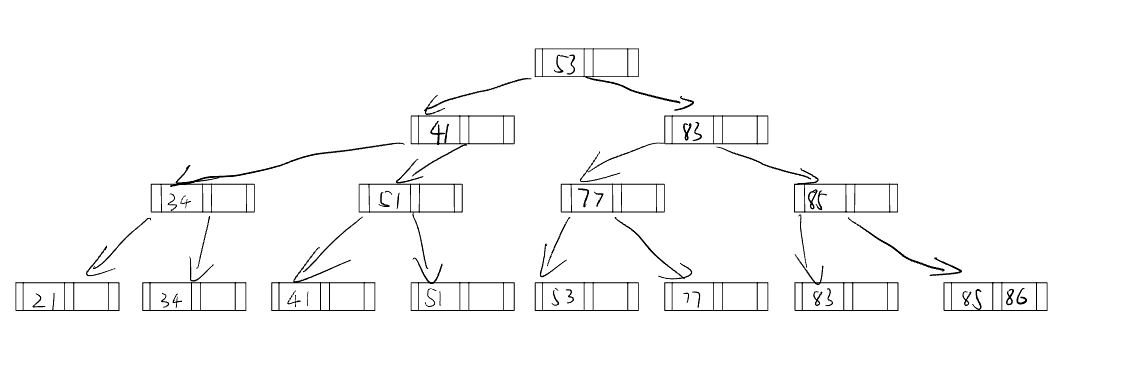  

3.insert the search-key values 32, 84, and 19 in sequence to the given B+-tree, and draw a new diagram
for each insertion.  
insert 32:  
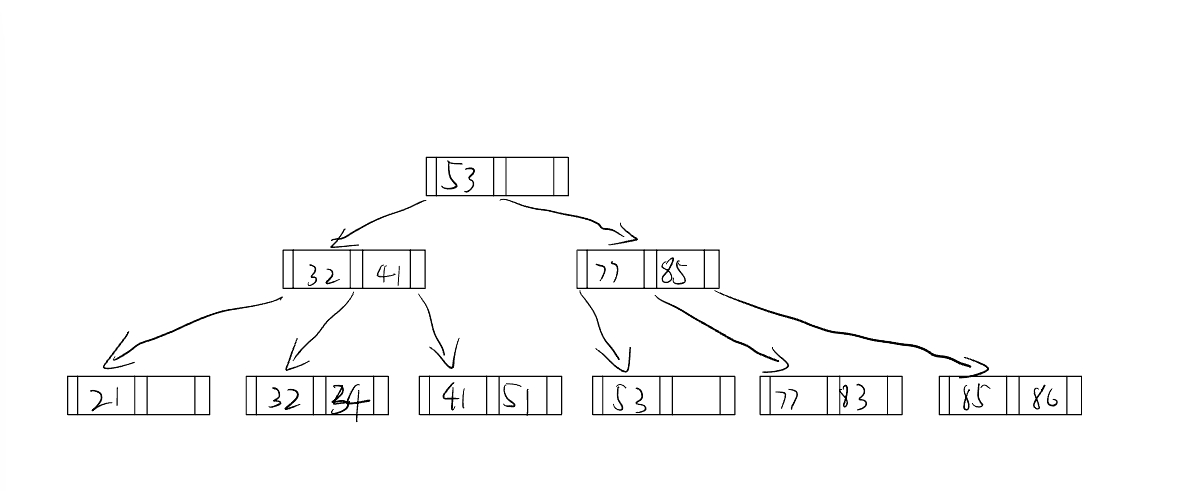  
insert 84:  
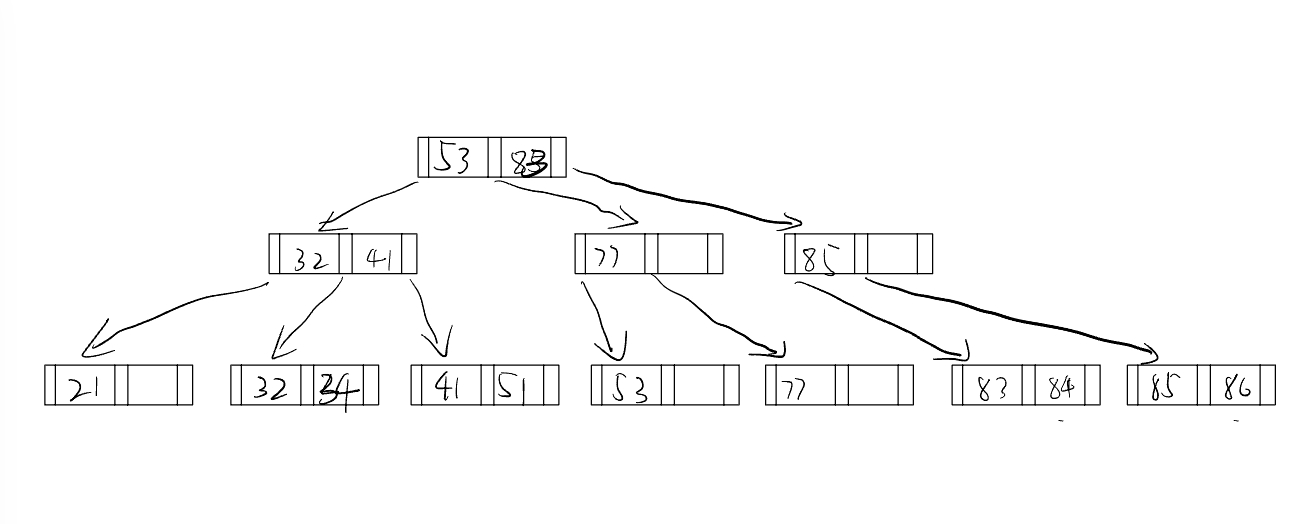  
insert 19:  
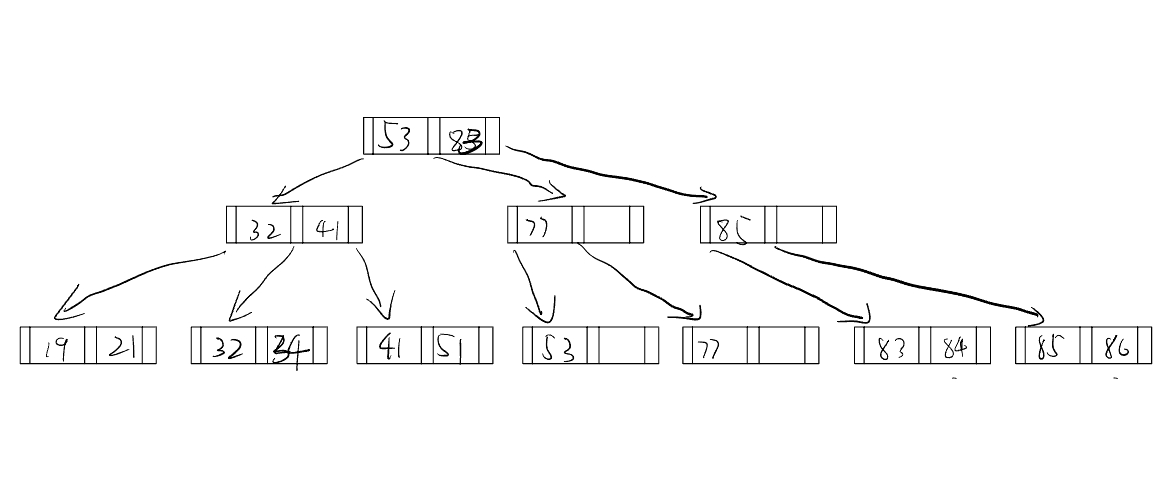  

4.Suggest a sequence of search-key values to be deleted from the resultant B+-tree in Q2.2 to shrink the
tree to 2 levels with the least number of deletions. Show the steps by drawing a new diagram whenever a node
is deleted.
**Solution:**  
53, 34, 21, 41, 77  
delete 53:  
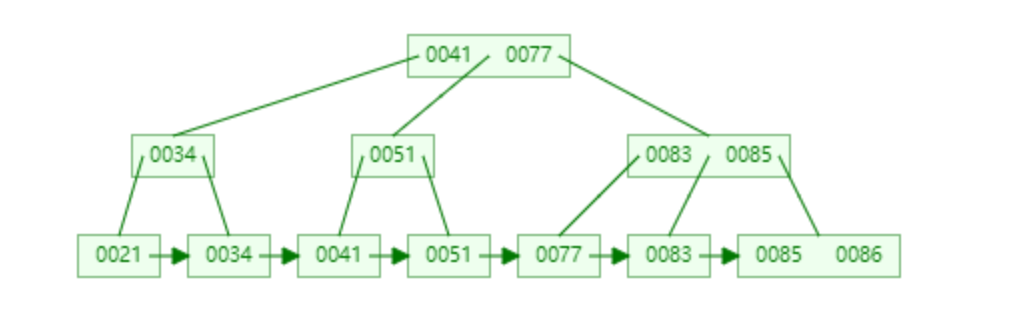  
delete 34:  
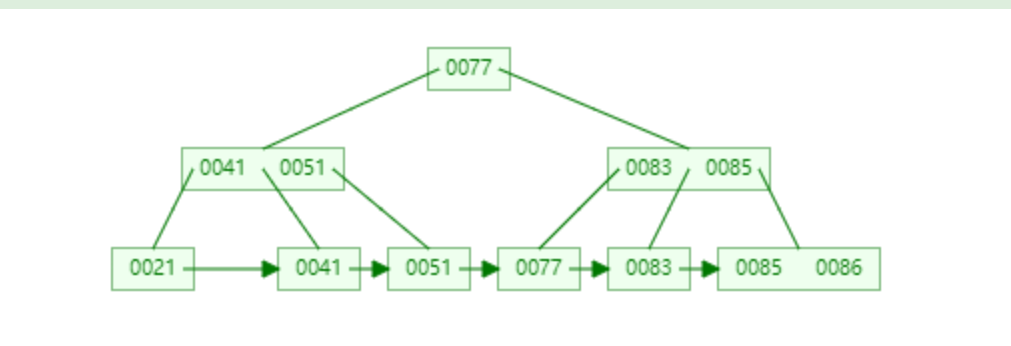  
delete 21:  
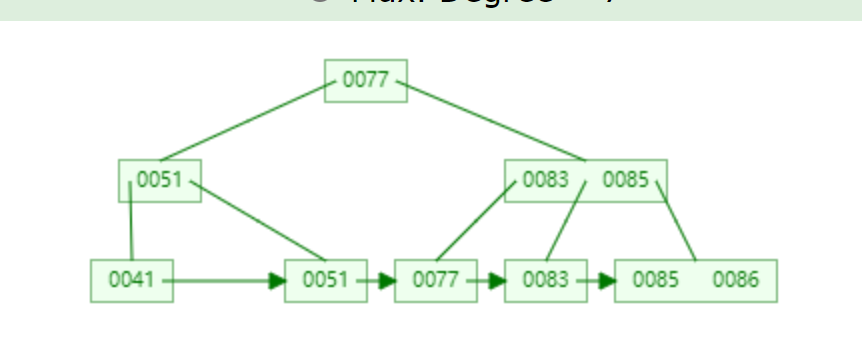  
delete 41:  
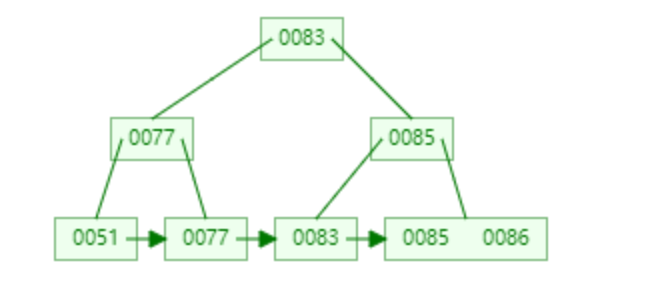  
delete 77:  
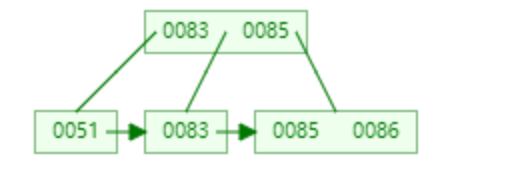















## Question 3 - Data Querying  
The university conducted a hacker contest which consists of a set of small tasks. The participants can
submit the solutions to each task and obtain the score regarding each submission. The top-3 participants of each task
will win the corresponding bonus.
Given the following SQL tables,  
```sql
Hackers(hacker_id: INT, name: VARCHAR, Bank_account: INT)  
Tasks(task_id: INT, task_description: VARCHAR, bonus: INT)  
Submissions(submission_id: INT, hacker_id: INT, task_id: INT, score: INT, submission_data: DATE)  
```
Assuming that,  
•The id values, including hack id, task id, submission id, are unique and serve as foreign keys.  
•There are 10,000 hackers registering the contest, but not all hackers have the submissions.  
•There are totally 50 small tasks. For each task, hackers can have multiple submissions, but only the last  
submission obtaining the best score will be considered when calculating the final winner shortlist. If more
than three submissions achieved top-3 scores, only the earliest three submissions will be rewarded. The earlier
submission has the smaller submission id.  
•There are totally 100,000 submissions. The scores of all tasks range from 0 to 100


1.Write the query to print the hacker id, name of the hacker who has the most submissions. If more
than one such hacker has the maximum submission number, the results are sorted by ascending hack id.
**Solution:**
```sql 
SELECT h.hacker_id, h.name
FROM Hackers h
JOIN (
    SELECT hacker_id, COUNT(*) as submission_count
    FROM Submissions
    GROUP BY hacker_id
    HAVING submission_count = (
        SELECT MAX(submission_count)
        FROM (
            SELECT hacker_id, COUNT(*) as submission_count
            FROM Submissions
            GROUP BY hacker_id
        )
    )
) max_submission
ON h.hacker_id = max_submission.hacker_id
ORDER BY h.hacker_id;
```

2.Write the query to print the task id, task description and the number of submissions received
of the task which receives the most submissions. If there are more than one such task, the results are sorted by
the ascending task id.  
**Solution:**
```sql
SELECT t.task_id, t.task_description, COUNT(*) as submission_count
FROM Tasks t
JOIN (
    SELECT task_id, COUNT(*) as submission_count
    FROM Submissions
    GROUP BY task_id
    HAVING submission_count = (
        SELECT MAX(submission_count)
        FROM (
            SELECT task_id, COUNT(*) as submission_count
            FROM Submissions
            GROUP BY task_id
        ) 
    )
) max_submission
ON t.task_id = max_submission.task_id
ORDER BY t.task_id;
```



3.Write the query to print the submission id, name, task description of the submission whose score
is the highest one among all scores obtained on 2022-10-01. If more than one such submissions, the results are
sorted by ascending submission id  
**Solution:**
```sql
SELECT score_max.submission_id, h.name, t.task_description
FROM Tasks t
JOIN (
    SELECT hacker_id, submission_id, task_id, MAX(score) as max_score
    FROM Submissions
    WHERE submission_data = '2022-10-01'
    GROUP BY task_id
) score_max
ON t.task_id = score_max.task_id
JOIN Hackers h
ON h.hacker_id = score_max.hacker_id
ORDER BY s.submission_id;
```


4.Write the query to print the hacker id, name of the hacker who has the highest total scores on all
tasks. For each task, if the hacker has multiple submissions, only the best score is accounted. If more than one
such hacker, the results are sorted by descending hacker id  
**Solution:**
```sql
SELECT h.hacker_id, h.name
FROM Hackers h
JOIN 
(SELECT hacker_id, SUM(score) as total_score
    FROM 
    (
        SELECT hacker_id, task_id, max(score) as score
        FROM Submissions
        GROUP BY hacker_id, task_id
    ) hacker_task_score
    GROUP BY hacker_id
    HAVING total_score = (
        SELECT MAX(total_score)
        FROM (
            SELECT hacker_id, SUM(score) as total_score
            FROM  hacker_task_score
            GROUP BY hacker_id
        )
    )
) hacker_total_score
ON h.hacker_id = hacker_total_score.hacker_id
ORDER BY h.hacker_id DESC;
```



5.write the query to print the hacker id, name, bonus of the hackers and the task fulfilling the
requirement that the hackers win the bonus on task with task id=25
**Solution:**
```sql
SELECT h.hacker_id, h.name, t.bonus
FROM Hackers h
JOIN (
    SELECT hacker_id, task_id, MAX(score) as score
    FROM Submissions
    GROUP BY hacker_id, task_id
) hacker_task_score
ON h.hacker_id = hacker_task_score.hacker_id
JOIN Tasks t
ON t.task_id = hacker_task_score.task_id
WHERE t.task_id = 25;
```


6.Write the query to print the hacker id, hacker name, bank account and the total bonus of all
participants. The result is sorted by descending total bonus and ascending hacker id. Exclude all hackers
with a total bonus of 0 from the result
**Solution:**
```sql
SELECT h.hacker_id, h.name, h.bank_account, COALESCE(SUM(t.bonus), 0) AS total_bonus
FROM Hackers h
LEFT JOIN Submissions s ON h.hacker_id = s.hacker_id
LEFT JOIN Tasks t ON s.task_id = t.task_id
GROUP BY h.hacker_id, h.name, h.bank_account
HAVING COALESCE(SUM(t.bonus), 0) > 0
ORDER BY total_bonus DESC, h.hacker_id ASC;



## Question 4 - Recommender System


1. Please write two basic approaches for recommender system and briefly explain them
   
**Solution:** 

Collaborative filtering methods: Collaborative filtering method finds a subset of users whohave similar tastes and preferences to the target user and use this subset for offering recommendations.  
Basic Assumptions :
- Users with similar interests have common preferences.
- Sufficiently large number of user preferences are available.  
  
Content based methods: Content-based recommender systems use items or user metadata to create specific recommendations. In this system, keywords are used to describe the items, and a user profile is built to indicate the type of item this user likes. In other words, these algorithms try to recommend items similar to those that a user liked in the past or is examining in the present. It does not rely on a user sign-in mechanism to generate this often temporary profile. In particular, various candidate items are compared with items previously rated by the user, and the best-matching items are recommended. This approach has its roots in information retrieval and information filtering research.

To create a user profile, the system mostly focuses on two types of information:

1. A model of the user's preference.

2. A history of the user's interaction with the recommender system.

2. Cold start is a severe problem for recommender system. Please explain what is cold start problem
in recommender system and how to solve it (list at least TWO methods).  

**Solution:**  

Explanation:The main goal of a recommendation system is to recommend a large number of items to a vast number of users, involving two types of entities: items and users. In any internet recommendation product, both items and users are constantly growing and changing. Therefore, one frequently encounters the cold start problem in recommendation systems, which refers to how to recommend items to new users or distribute new items to users who would like them.  
Additionally, for newly developed products with few initial users and limited user behavior data, conventional algorithms like collaborative filtering and deep learning that rely on a significant amount of user data may not effectively train accurate recommendation models. The challenge is to get the recommendation system up and running successfully and continually improve its accuracy, which is known as the system cold start problem.  
In summary, the recommendation system cold start problem can be categorized into three main types: item cold start, user cold start, and system cold start.  
Methods:  
1. Profile completion:  
    One of the available options when dealing with cold users or items is to rapidly acquire some preference data. There are various ways to do that depending on the amount of information required. These techniques are called preference elicitation strategies. This may be done either explicitly (by querying the user) or implicitly (by observing the user's behaviour). In both cases, the cold start problem would imply that the user has to dedicate an amount of effort using the system in its 'dumb' state – contributing to the construction of their user profile – before the system can start providing any intelligent recommendations.
2. Feature mapping:  
   In recent years more advanced strategies have been proposed, they all rely on machine learning and attempt to merge the content and collaborative information in a single model. One example of this approaches is called attribute to feature mapping which is tailored to matrix factorization algorithms. The basic idea is the following. A matrix factorization model represents the user-item interactions as the product of two rectangular matrices whose content is learned using the known interactions via machine learning. Each user will be associated to a row of the first matrix and each item with a column of the second matrix. The row or column associated to a specific user or item is called latent factors. When a new item is added it has no associated latent factors and the lack of interactions does not allow to learn them, as it was done with other items. If each item is associated to some features (e.g. author, year, publisher, actors) it is possible to define an embedding function, which given the item features estimates the corresponding item latent factors. The embedding function can be designed in many ways and it is trained with the data already available from warm items. Alternatively, one could apply a group-specific method. A group-specific method further decomposes each latent factor into two additive parts: One part corresponds to each item (and/or each user), while the other part is shared among items within each item group (e.g., a group of movies could be movies of the same genre). Then once a new item arrives, we can assign a group label to it, and approximates its latent factor by the group-specific part (of the corresponding item group). Therefore, although the individual part of the new item is not available, the group-specific part provides an immediate and effective solution. The same applies for a new user, as if some information is available for them (e.g. age, nationality, gender) then his/her latent factors can be estimated via an embedding function or a group-specific latent factor.

3. Rating prediction is an important task for the recommender system. Try to implement a recom-mendation model on the Movielens-100k dataset to predict user rating.   
   
**Solution:**

In [ ]:
import pandas as pd
import numpy as np

# read the data from the ml-100k/ua.base file and store it in a pandas dataframe
train_data_file=r'ml-100k/ml-100k/ua.base'
test_data_file=r'ml-100k/ml-100k/ua.test'
train_data=pd.read_csv(train_data_file,sep='\t',names=['user_id','item_id','rating','timestamp'])
test_data=pd.read_csv(test_data_file,sep='\t',names=['user_id','item_id','rating','timestamp'])


In [ ]:
# create a matrix and fill 0 values
train_data_matrix = train_data.pivot(index='user_id', columns='item_id', values='rating').fillna(0)
test_data_matrix=test_data.pivot(index='user_id',columns='item_id',values='rating').fillna(0)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy.sparse.linalg import svds

u, s, vt = svds(train_data_matrix.values, k = 20)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
X_pred.shape
predicted_ratings_svd = X_pred[test_data_matrix.values.nonzero()]
test_truth=test_data_matrix.values[test_data_matrix.values.nonzero()]

sqrt(mean_squared_error(predicted_ratings_svd,test_truth))
